In [1]:
import torch
import torch.nn as nn
from torch.optim import SGD
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
x = [[2,1], [4,2], [6,5], [17,13]]
y = [[1], [2], [1], [4]]

In [3]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [4]:
X = torch.tensor(x_scaled).float()
Y = torch.tensor(y).float()

In [5]:
import torch.nn as nn

In [6]:
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(2,8)
        self.activation2 = nn.ReLU()
        self.layer3 = nn.Linear(8, 1)

    def forward(self, x):
        x = self.layer1(x)
        x = self.activation2(x)
        x = self.layer3(x)
        return x

In [7]:
model = MyNeuralNet()

In [8]:
model

MyNeuralNet(
  (layer1): Linear(in_features=2, out_features=8, bias=True)
  (activation2): ReLU()
  (layer3): Linear(in_features=8, out_features=1, bias=True)
)

In [9]:
loss_fn = nn.MSELoss()

In [10]:
opt = SGD(model.parameters(), lr=0.01)

# Training Loop

In [14]:
losses = []
for _ in range(100): # 50 epochs
    opt.zero_grad() # Reinicia o gradiente
    y_pred = model(X)
    loss_value = loss_fn(model(X), Y) # Calcula a perda
    
    loss_value.backward() # Calcula o gradiente
    
    opt.step() # Atualiza os pesos
    # Salva a perda para plotar depois
    losses.append(loss_value.detach().numpy())

Text(0, 0.5, 'Valor do Erro')

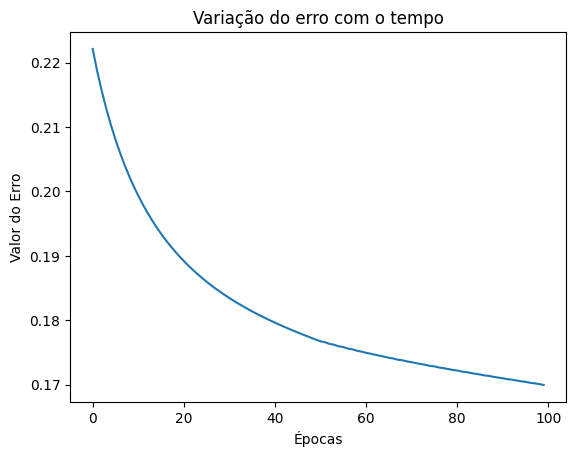

In [15]:
plt.plot(losses)
plt.title("Variação do erro com o tempo")
plt.xlabel("Épocas")
plt.ylabel("Valor do Erro")

In [22]:
val = [[9,7], [6,5], [8,6], [10,8]]
val_scaled = scaler.transform(val)
val_tensor = torch.tensor(val_scaled).float()
model(torch.tensor(val_tensor).to(device='cpu'))

C:\Users\guilh\AppData\Local\Temp\ipykernel_3484\4276197563.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  model(torch.tensor(val_tensor).to(device='cpu'))


tensor([[1.9545],
        [1.3379],
        [1.6443],
        [2.2647]], grad_fn=<AddmmBackward0>)